# __Predicting Airbnb Unlisting Project__ <img align='right' width='150' height='150' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>

## <font color='SeaGreen'>__Text Mining__</font><br>

> __Group O__ composed by:
>> __Daniel Franco, nº20210719__ <p>
>> __João Malho, nº20220696__ <p>

***

## 🧬 __Introduction__

__Your solution should present the following points:__

__1. Data Exploration (1.5 points):__

Here you should analyze the corpora and provide some conclusions and visual information (bar charts, word clouds, etc.) that contextualize the data.

__2. Data Preprocessing (2 points):__

You must apply a method to split your training corpus into train/validation sets to evaluate the performance of your model (you can also resort to KFold cross validation, or other methods). Moreover, you must correctly implement and experiment at least four (4) of the data preprocessing techniques shown in class (stop words, regular expressions, lemmatization, stemming, etc.).

__3. Feature Engineering (5 points):__

You must correctly implement and experiment with two (2) of the feature engineering techniques seen in class (TF-IDF, GloVe embeddings, etc.).

__4. Classification Models (4.5 points):__

You must correctly implement and test three (3) of the classification algorithms seen in class (KNN, LR, MLP, LSTM, etc.). 

__5. Evaluation (1.5 points):__

You must evaluate your models resorting, at least, to Recall, Precision, Accuracy and F1-Score.
Moreover, the development of extra work (more techniques than the minimum required in the previous points and/or techniques not shown in class) is highly recommended and will account for a maximum of 4.5 points divided as follows:
    
>__1. Data Preprocessing__ – 0.25 points for each extra method (unseen in class) used (maximum of 2 extra methods).

>__2. Feature Engineering__ – 1 point for each extra method using Transformed-based embeddings (maximum of 2 extra methods)

>__3. Classification Models__ – 1 point for each extra


## 📖 __Glossary__

__The data is divided in following sets:__

* __Train (train.xlsx) (12,496 lines):__

> Contains the Airbnb and host descriptions (“description” and “host_about” columns), as well as the information regarding the property listing status (“unlisted” column). A property is considered unlisted (1) if it got removed from the quarterly Airbnb list and it is considered listed (1) if it remains on that same list.

* __Train Reviews (train_reviews.xlsx) (72,1402):__ 

> This file has all the guests’ comments made to each Airbnb property. Note that there can be more than one comment per property, not all properties have comments, and comments can appear in many languages!

* __Test (test.xlsx) (1,389 lines):__

> The structure of this dataset is the same as the train set, except that it does not contain the “unlisted” column. The teaching team is keeping this information secret! You are expected to provide the predicted status (0 or 1) for each Airbnb in this set. Once the projects are delivered, we will compare your predictions with the actual (true) labels.

* __Test Reviews (test_reviews.xlsx) (80,877):__ 

> The structure of this dataset is the same as the train reviews set, but the comments correspond to the properties present on the test set

***

## 📈 __Methodology__


***
## 👨🏻‍💻 __Code Changes__



### __1. Libraries and Data import__

In [50]:

#!pip install wordcloud
#!pip install langdetect
#!pip install googletrans
import os
import re
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from sklearn import metrics
import plotly.express as px
from langdetect import detect
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
import plotly.graph_objects as go
from googletrans import Translator
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS 
from sklearn.tree import DecisionTreeClassifier
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [5]:
current_directory = os.getcwd()

corpora_test = pd.read_excel(os.path.join(current_directory, 'test.xlsx'))
corpora_train = pd.read_excel(os.path.join(current_directory, 'train.xlsx'))
corpora_test_review = pd.read_excel(os.path.join(current_directory, 'test_reviews.xlsx'))
corpora_train_review = pd.read_excel(os.path.join(current_directory, 'train_reviews.xlsx'))


## 1. Data Exploration 
* data presentation and explanation of the main finding from the exploratory analysis (accounts for 50% of criteria 4.1).

In [6]:
# Check data information
corpora_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        1389 non-null   int64 
 1   description  1389 non-null   object
 2   host_about   1389 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.7+ KB


In [7]:
corpora_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        12496 non-null  int64 
 1   description  12496 non-null  object
 2   host_about   12496 non-null  object
 3   unlisted     12496 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


In [8]:
corpora_test_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80877 entries, 0 to 80876
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     80877 non-null  int64 
 1   comments  80877 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [9]:
corpora_train_review.head(10)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
5,1,Our stay in Lisbon Tip Hostel was very good. T...
6,1,Close to shops in town and a comfortable place...
7,1,Young and friendly staff. Great location along...
8,1,The place is just off the Parque metro stop wh...
9,1,Had a nice stay at this hostel. The beds were ...


In [10]:
corpora_train.head(2)

# Hotels names, user names, numbers

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1


In [11]:
# Calculate the percentage for each category
total = len(corpora_train)
corpora_train_counts = corpora_train['unlisted'].value_counts()
corpora_train_percentages = 100 * corpora_train_counts / total

# Create the horizontal bar chart
fig = go.Figure(data=[
    go.Bar(
        y=corpora_train_percentages.index,
        x=corpora_train_percentages.values,
        orientation='h',
        marker=dict(color='rgb(121, 157, 196)')
    )
])

# Add percentage labels to each bar
for i, percentage in enumerate(corpora_train_percentages.values):
    fig.add_annotation(
        x=percentage + 2,
        y=corpora_train_percentages.index[i],
        text=f'{percentage:.1f}%',
        showarrow=False,
        font=dict(size=12, color='black')
    )

# Set the layout
fig.update_layout(
    title='Count of Unlisted',
    xaxis_title='Percentage',
    yaxis_title='Unlisted',
    yaxis=dict(autorange="reversed"),
    height=400,
    width=800,
    margin=dict(l=100, r=20, t=60, b=20)
)

# Show the plot
fig.show()


* __Noted that train data is not balanced, model will be train with ~28% of unlisted individuals.__

In [12]:
# detect language
def detect_textlang(text):
    try:
        src_lang = detect(text)
        if src_lang =='en':
            return 'en'
        else:
        #return "NA"    
            return src_lang
    except:
        return "NA"
corpora_train['description_language']=corpora_train.description.apply(detect_textlang)
#corpora_train_review['comments_language']=corpora_train_review.comments.apply(detect_textlang)

In [14]:
# Calculate the percentage for each category
total = len(corpora_train)
corpora_train_counts = corpora_train['description_language'].value_counts()
corpora_train_percentages = 100 * corpora_train_counts / total

# Create the horizontal bar chart
fig = go.Figure(data=[
    go.Bar(
        y=corpora_train_percentages.index,
        x=corpora_train_percentages.values,
        orientation='h',
        marker=dict(color='rgb(121, 157, 196)')
    )
])

# Add percentage labels to each bar
for i, percentage in enumerate(corpora_train_percentages.values):
    fig.add_annotation(
        x=percentage + 2,
        y=corpora_train_percentages.index[i],
        text=f'{percentage:.1f}%',
        showarrow=False,
        font=dict(size=12, color='black')
    )

# Set the layout
fig.update_layout(
    title='Languages in Train',
    xaxis_title='Percentage',
    yaxis_title='Language',
    yaxis=dict(autorange="reversed"),
    height=400,
    width=800,
    margin=dict(l=100, r=20, t=60, b=20)
)

# Show the plot
fig.show()



* __Notable existance of several possible languages__

In [15]:
# Missing values reporter function
def missing_value_reporter(data, threshold=None):

    na_count = data.isna().sum() 
    na_count = na_count[na_count > 0]
    na_abs_frq = na_count.values
    na_rel_frq = round(na_count/len(data),2)
    missings = pd.DataFrame({'Feature': na_count.index, 'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)
    
    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
        
    return missings

In [16]:
missing_value_reporter(corpora_train)

,Feature,Nº of missings,% of missings


In [17]:
missing_value_reporter(corpora_test)

,Feature,Nº of missings,% of missings


In [18]:
missing_value_reporter(corpora_train_review)

,Feature,Nº of missings,% of missings
comments,comments,4,0.0


In [19]:
missing_value_reporter(corpora_test_review)

,Feature,Nº of missings,% of missings


In [20]:
# Drop missing values
corpora_train_review = corpora_train_review.dropna()

* __Checked the existance of missing values only in file `"corpora_train_review"`, once are only 4 line is full data this ones were dropped.__

__After data analysis can be noted that:__

> File `corpora_train_review`:
__Features__:

1. __[index]__ - (Int) Index correspondency with Index in file `corpora_train`
2. __[comments]__ - (Str) Each comment per line


> File `corpora_test_review`:
__Features__:

1. __[index]__ - (Int) Index correspondency with Index in file `corpora_test`
2. __[comments]__ - (Str) Each comment per line


> File `corpora_train`:
__Features__:

1. __[index]__ - (Int) Index correspondency
2. __[description]__ - (Str) Description of the asset
3. __[host_about]__ - (Str) Description of the asset host
4. __[unlisted]__ - (Bool) Is asset unlisted or not 

> File `corpora_test`:
__Features__:

1. __[index]__ - (Int) Index correspondency
2. __[description]__ - (Str) Description of the asset
3. __[host_about]__ - (Str) Description of the asset host


Is also noted that train data is not balanced, model will be train with ~28% of unlisted individuals.

Our data contains several languages as well were the majority is 81,6% of English although there are more.

Is notable the existence of 4 missing values that were dropped due the residual impact.

## 2. Data Preprocessing 
* explanation of the different preprocessing methods developed (accounts for 25% of criteria 4.Erro! A origem da referência não foi encontrada.).

__Data Cleaning:__

* __Lowercase text__
> Converting everything to lowercase reducing vocabulary size

* __Remove Numerical Data and Punctuation__
> Normalize Dates and Numbers

* __Remove Stop Words__
> Removing words that are not very informative. Less tokens same meaning.

* __Lemmatize__
> Turning words into their root word

* __Stemmer__
> Remove last few characters to obtain the shorter form of each word, this one is setted to False in order to not perform.

***

In [21]:
# Data Pre Processing
stop = stopwords.words('english')

def pre_process(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        # Lowercase text
        text = text.lower()
        
        # Remove tags
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
        
        # Remove special characters and digits
        text = re.sub("[^a-zA-Z]", " ", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = re.sub('[0-9]+', '', text)
        text = re.sub(r'http\S+', '',text)
        
        # Remove stopwords
        text = " ".join([word for word in text.split() if word not in stop])
        
        # Lemmatize
        if lemmatize:
            lemma = WordNetLemmatizer()
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        # Stemming
        if stemmer:
            stemmer = SnowballStemmer('english')
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

corpora_train['description_clean'] = pre_process(corpora_train['description'], lemmatize=True, stemmer=False)


  0%|          | 0/12496 [00:00<?, ?it/s]

100%|██████████| 12496/12496 [00:17<00:00, 697.76it/s]


In [22]:
corpora_train['host_about_clean'] = pre_process(corpora_train['host_about'], lemmatize=True, stemmer=False)

  1%|▏         | 161/12496 [00:00<00:07, 1577.24it/s]

100%|██████████| 12496/12496 [00:08<00:00, 1497.41it/s]


In [23]:
corpora_test['description_clean'] = pre_process(corpora_test['description'], lemmatize=True, stemmer=False)

  5%|▌         | 74/1389 [00:00<00:01, 708.95it/s]

100%|██████████| 1389/1389 [00:01<00:00, 768.60it/s]


In [24]:
corpora_test['host_about_clean'] = pre_process(corpora_test['host_about'], lemmatize=True, stemmer=False)

  9%|▉         | 130/1389 [00:00<00:01, 1234.50it/s]

100%|██████████| 1389/1389 [00:01<00:00, 1372.21it/s]


In [25]:
corpora_test_review['comments_clean'] = pre_process(corpora_test_review['comments'], lemmatize=True, stemmer=False)

  0%|          | 188/80877 [00:00<00:43, 1872.24it/s]

100%|██████████| 80877/80877 [00:35<00:00, 2287.12it/s]


In [26]:
corpora_train.description_clean[0]

'shared mixed room hostel shared bathroom br located right across street subway station parque min walk marque de pombal square br br b space b br offer woman room mixed room double room twin room single room family room kitchen open guest lounge guest gather cable tv room come standard equipped comfortable bed linen blanket reading lamp side table free wi fi access guest curfew access late check sleep late br br b guest access b br room key card access'

In [131]:
# Retorn error probably due the size or strange word
# corpora_train_review['comments_clean'] = pre_process(corpora_train_review['comments'], lemmatize=True, stemmer=False)


1. Were created new features according to each column in each file.

2. New Features regard a sufix in their name as __`"_clean"`__.

3. The new features regard the new data already __Tokenized__ (process of splitting a text into individual words or tokens), in __Lowercase__ (no Uppercase Letters), __without special characters, digits, tags and stopwords__ and __Lemmatized__ (word in their root word). 

## 3. Feature Engineering
* description of the methods implemented (accounts for 25% of
criteria 4.3)

* The oject in study will be file __`"corpora_train"`__ which is the one that will be used for model train

* Feature Importance 
    > Term Frequency 
    
    TF = (Number of times the word appears in the document) / (Total number of words in the document)

    > Inverse Doc. Frequency

    IDF = log((Total number of documents in the corpus) / (Number of documents containing the word))

In [132]:
# #Translate to English
# from googletrans import Translator
# def translate_text(lang,text):
#     translator= Translator()
#     trans_text = translator.translate(text, src=lang).text
#     return trans_text

# corpora_train['translated_text']=corpora_train.apply(lambda x: x.description_clean if x.text_lang == 'en' else translate_text(x.text_lang, x.description_clean), axis=1)
# corpora_train.translated_text = corpora_train.translated_text.str.lower()

### __3.1 TFIDF__

* Vectorization of information, in x_train and x_test to train the models

In [27]:
# Splitting data only using Train data due Test data dont regard the label to check the model performance, 
# due that model test will be performed in train subset 
X = corpora_train['description_clean']
y = corpora_train['unlisted']

# Setting random states seedz
seed = 0

# Splitrin the data, leaving 20% in the hold out sample
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    random_state = seed,
                                                    shuffle = True,
                                                    stratify = y,
                                                    test_size = .2,
                                                )

print('train: {}% - {} Individuals \ntest: {}% - {} Individuals'.format(
                                                                round(len(y_train)/len(y)*100),
                                                                len(y_train),
                                                                round(len(y_test)/len(y)*100),
                                                                len(y_test)
                                                                ))


train: 80% - 9996 Individuals 
test: 20% - 2500 Individuals


In [28]:
tfidf = TfidfVectorizer(
                        sublinear_tf=True,
                        analyzer="word",
                        ngram_range=(1,2),
                        max_features=5000, 
                        stop_words="english"
                        )

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

## 4. Classification Models
* description of the models implemented (accounts for 25% of criteria 4.4)

In [63]:
def model_base():

    # Setting models seed for reproducibility
    seed = 0

    # Creating base classifiers' instance
    # tree based  & ensemble boosting models (better performance with raw data)
    #DT_model = DecisionTreeClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Decision Tree
    #RF_model = RandomForestClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Random Forest
    #ET_model = ExtraTreesClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Extra Tree
    #HGB_model = HistGradientBoostingClassifier(random_state=seed).fit(X_train_tfidf, y_train)# Histogram-based Gradient Boosting
    #ADA_model =  AdaBoostClassifier(random_state = seed).fit(X_train_tfidf, y_train) # Adaptative Boosting
    #GB_model = GradientBoostingClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Gradient Boosting
    #XGB_model = XGBClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Extreme Gradient Boosting
    LR_model = LogisticRegression(random_state=seed).fit(X_train_tfidf, y_train) # Logistic Regression
    KNN_model = KNeighborsClassifier().fit(X_train_tfidf, y_train) # K-Nearest Neighbors
    #B_model = BaggingClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Bagging Classifier
    #SVC_model = SVC(random_state=seed).fit(X_train_tfidf, y_train) # Support Vector Classification
    Gaussian_model = GaussianNB().fit(X_train_tfidf, y_train) # Gaussian Naive Bayes
    NN_model = MLPClassifier(random_state=seed).fit(X_train_tfidf, y_train) # Neural Network
    #SGD_model = SGDClassifier(random_state=seed).fit(X_train_tfidf, y_train) #  Stochastic Gradient Descent

    # Creating estimators list
    estimators = [
                #('DT', DecisionTreeClassifier()),
                #('RF', RandomForestClassifier()),
                #('ET', ExtraTreesClassifier()), 
                #('HGB', HistGradientBoostingClassifier()),
                #('ADA', AdaBoostClassifier()),
                #('GB', GradientBoostingClassifier()),
                #('XGB', XGBClassifier()),
                ('LR', LogisticRegression()),
                ('KNN', KNeighborsClassifier()),
                #('Bagging', BaggingClassifier()), 
                #('SVM', SVC()),
                ('Gaussian', GaussianNB()),
                ('NN', MLPClassifier()),
                #('SGD', SGDClassifier())
                ]

    # Creating base ensemble models instances
    #S_model = StackingClassifier(estimators).fit(X_train_tfidf, y_train) #  Stacking
    #V_model = VotingClassifier(estimators).fit(X_train_tfidf, y_train) #  Voting

    # all base models list
    models = [
        #DT_model,
        #RF_model,
        #ET_model,
        #HGB_model,
        #ADA_model,
        #GB_model,
        #XGB_model,
        LR_model,
        KNN_model,
        #B_model,
        #SVC_model,
        Gaussian_model,
        NN_model,
        #SGD_model,
        #S_model ,
        #V_model
        ]

    # creating list of models names
    model_str = [str(model) for model in models] # getting model raw names
    # formating names
    model_str = [model.split('(', 1)[0] for model in model_str]
    model_name = [' '.join(re.findall('[A-Z][^A-Z]*', model)) for model in model_str]

    # creating dataframe for results
    df = pd.DataFrame(columns = ['Model', 'F1-Score', 'Accuracy', 'Precision', 'Recall', 'AUC'])
        
    for model, name in zip(models, model_name):
        instance = model  # instance model
        y_pred = instance.predict(X_test_tfidf)  # raw data prediction

        # benchmark metrics
        f1 = metrics.f1_score(y_test, y_pred, average='micro')
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='micro')
        recall = metrics.recall_score(y_test, y_pred, average='micro')
        roc = metrics.roc_auc_score(y_test, y_pred)

        # adding row with model name and respective metrics
        df.loc[name] = [name, f1, accuracy, precision, recall, roc]

    # sorting by the F1-score
    df.sort_values(by='F1-Score', ascending=False, inplace=True)
    # setting Model names as index
    df.set_index('Model', inplace=True)

    return df

In [64]:
# checking best base models          
base_model = model_base()

base_model.style

,F1-Score,Accuracy,Precision,Recall,AUC
Model,,,,,
Logistic Regression,0.759600,0.759600,0.759600,0.759600,0.595290
K Neighbors Classifier,0.757600,0.757600,0.757600,0.757600,0.658402
M L P Classifier,0.755600,0.755600,0.755600,0.755600,0.677035
Gaussian N B,0.710800,0.710800,0.710800,0.710800,0.654940


# WIP -------------------------------------------

In [86]:
confusion_matrix(y_pred_word, y)

array([[9015,  136],
       [  18, 3327]], dtype=int64)

C:\Users\joaom\AppData\Local\Temp\ipykernel_21808\902166482.py:42: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



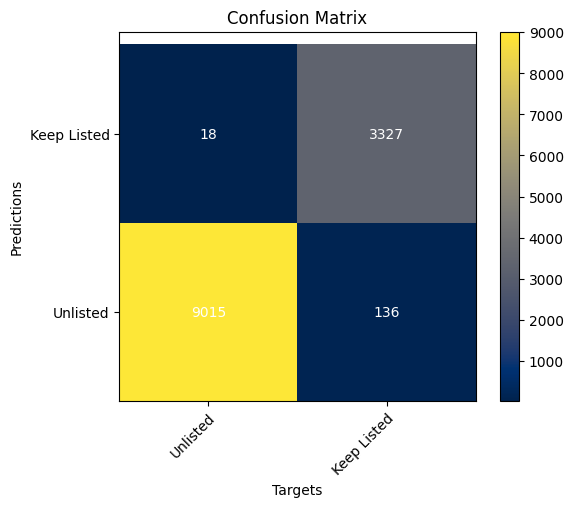

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                        ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred_word, y), labels.keys())

In [90]:
# N Gram
ngram_tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))
X_ngram = ngram_tfidf.fit_transform(corpora_train["description_clean"])

## N Gram Classifier
knn_ngram = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
knn_ngram.fit(X_ngram,y)

X_test_ngram = ngram_tfidf.transform(corpora_train["description_clean"])
y_pred_ngram = knn_ngram.predict(X_test_ngram)

print(classification_report(y_pred_ngram, y, target_names = labels.keys()))

confusion_matrix(y_pred_ngram, y)

              precision    recall  f1-score   support

    Unlisted       0.99      0.99      0.99      9011
 Keep Listed       0.98      0.97      0.98      3485

    accuracy                           0.99     12496
   macro avg       0.98      0.98      0.98     12496
weighted avg       0.99      0.99      0.99     12496



array([[8939,   72],
       [  94, 3391]], dtype=int64)

C:\Users\joaom\AppData\Local\Temp\ipykernel_21808\902166482.py:42: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



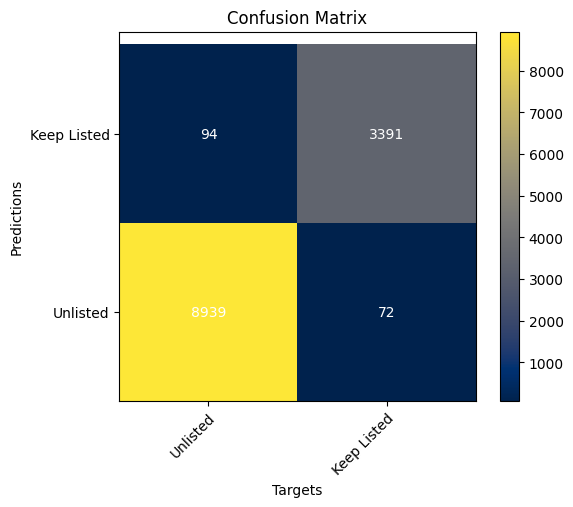

In [91]:
plot_cm(confusion_matrix(y_pred_ngram, y), labels.keys())